In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
import sklearn

In [2]:
d=pd.read_csv("C:\\Users\\USER\\Downloads\\master.csv")
d

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [3]:
d.shape

(27820, 12)

In [4]:
d.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
d.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [6]:
d.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
d.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [8]:
#Renaming the columns names for convinience

d.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 
                'population', 'suicide_rate', 'country-year', 'HDI',
                'gdp_for_year', 'gdp_per_capita', 'generation']
d.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [9]:
d

,country,year,gender,age_group,suicide_count,population,suicide_rate,country-year,HDI,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [10]:
n_samples, n_features = d.shape
d.shape

(27820, 12)

In [11]:
##The 'country-year' column seems unnecessary the information already present in the separate 'country' and 'year' columns.
d1 = d.drop('country-year', axis=1)
n_features -= 1
d1.shape

(27820, 11)

In [12]:
d1

,country,year,gender,age_group,suicide_count,population,suicide_rate,HDI,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


In [13]:
cat_col = [col for col in d1.columns if d1[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in d1.columns if d1[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['country', 'gender', 'age_group', 'gdp_for_year', 'generation']
Numerical columns : ['year', 'suicide_count', 'population', 'suicide_rate', 'HDI', 'gdp_per_capita']


In [14]:
d1.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_count      2084
population        25564
suicide_rate       5298
HDI                 305
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

In [15]:
d1[cat_col].nunique()

country          101
gender             2
age_group          6
gdp_for_year    2321
generation         6
dtype: int64

In [16]:
d1.describe()

,year,suicide_count,population,suicide_rate,HDI,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


# data cleaning

In [17]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   HDI             8364 non-null   float64
 8   gdp_for_year    27820 non-null  object 
 9   gdp_per_capita  27820 non-null  int64  
 10  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.3+ MB


In [18]:
d1.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
HDI               19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [19]:
d1['HDI'].value_counts()

0.772    84
0.713    84
0.888    84
0.830    72
0.761    72
         ..
0.696    12
0.894    12
0.893    12
0.770    12
0.675    12
Name: HDI, Length: 305, dtype: int64

In [20]:
d1.HDI=d1.HDI.fillna(2.0)

In [21]:
d1['HDI'].value_counts()

2.000    19456
0.713       84
0.772       84
0.888       84
0.761       72
         ...  
0.686       12
0.894       12
0.893       12
0.696       12
0.675       12
Name: HDI, Length: 306, dtype: int64

In [22]:
##Dropping 'HDI_for_year' column due to significant missing data of approximately 70%.
d1.drop('HDI', axis=1, inplace=True)

In [23]:
d1.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_count     0
population        0
suicide_rate      0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

# Data Conversion

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
d1.dtypes

country            object
year                int64
gender             object
age_group          object
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation         object
dtype: object

In [26]:
d1['gdp_for_year'] = d1['gdp_for_year'].str.replace(',','').astype(float)

In [27]:
numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
d1[numerical] = rc.fit_transform(d1[numerical])

d1



,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,Generation X
1,Albania,1987,male,35-54 years,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,Silent
2,Albania,1987,female,15-24 years,-0.085938,-0.101142,-0.073885,-0.182942,-0.400243,Generation X
3,Albania,1987,male,75+ years,-0.187500,-0.294064,-0.089172,-0.182942,-0.400243,G.I. Generation
4,Albania,1987,male,25-34 years,-0.125000,-0.112232,-0.172611,-0.182942,-0.400243,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,0.640625,2.297696,-0.192994,0.059520,-0.329631,Generation X
27816,Uzbekistan,2014,female,75+ years,-0.125000,-0.058824,-0.217197,0.059520,-0.329631,Silent
27817,Uzbekistan,2014,male,5-14 years,0.273438,1.679341,-0.243312,0.059520,-0.329631,Generation Z
27818,Uzbekistan,2014,female,5-14 years,0.148438,1.585323,-0.275159,0.059520,-0.329631,Generation Z


In [28]:
d1.country.value_counts()

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [29]:
d1.country=le.fit_transform(d1.country)

In [30]:
d1['country'].value_counts()

57    382
6     382
61    382
41    382
15    372
     ... 
14     24
17     12
27     12
54     12
59     10
Name: country, Length: 101, dtype: int64

In [31]:
d1.gender.value_counts()

male      13910
female    13910
Name: gender, dtype: int64

In [32]:
d1.gender=le.fit_transform(d1.gender)

In [33]:
d1['gender'].value_counts()

1    13910
0    13910
Name: gender, dtype: int64

In [34]:
d['age_group'].value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [35]:
d1.age_group=le.fit_transform(d1.age_group)

In [36]:
d1['age_group'].value_counts()

0    4642
2    4642
5    4642
1    4642
4    4642
3    4610
Name: age_group, dtype: int64

In [37]:
d1['generation'].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [38]:
d1.generation=le.fit_transform(d1.generation)

In [39]:
d1['generation'].value_counts()

2    6408
5    6364
4    5844
0    4990
1    2744
3    1470
Name: generation, dtype: int64

In [40]:
d.country.nunique()

101

In [41]:
d.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [42]:

d.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [43]:
d.age_group.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [44]:
d1.age_group.describe()

count    27820.000000
mean         2.499425
std          1.708754
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: age_group, dtype: float64

# Base model

In [45]:
##splitting train data  for model building
d1.head(2)

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,1987,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243,2
1,0,1987,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243,5


In [46]:
x=d1.iloc[:,1:-1]
x.head(2)


,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita
0,1987,1,0,-0.031250,-0.084435,0.045860,-0.182942,-0.400243
1,1987,1,2,-0.070312,-0.087963,-0.050955,-0.182942,-0.400243


In [47]:
y=d1.iloc[:,-1]
x=d1.iloc[:,1:]
y.head(2)

0    2
1    5
Name: generation, dtype: int32

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y = d['suicide_rate']
X = d.drop('suicide_rate',axis=1)
X.shape, y.shape

((27820, 11), (27820,))

In [50]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.2, random_state = 12)
x_tr.shape, x_te.shape

((22256, 9), (5564, 9))

In [51]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((22256, 9), (5564, 9), (22256,), (5564,))

# linear regression

In [52]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(x_tr, y_tr)

LinearRegression()

In [53]:
p=lr.predict(x_te)
p

array([3.74000000e+00, 5.37000000e+00, 3.56000000e+00, ...,
       2.28100000e+01, 1.42108547e-14, 2.20400000e+01])

In [54]:
lr.intercept_     

5.989999999999908

In [55]:
lr.coef_ 

array([ 4.50695218e-17,  2.08726589e-14,  4.96615299e-15,  2.56754401e-15,
       -5.80242635e-15,  1.57000000e+01,  1.07590228e-15, -1.93134502e-15,
       -3.48502070e-15])

In [56]:
#R2=SSR/(SSR+SSE)
p_tr=lr.predict(x_tr)
sse=np.sum(np.square(p_tr-y_tr))
sse
#p_train

1.354935602387527e-23

In [57]:
mean_y=y_tr.mean()
mean_y

12.766568565780014

In [58]:
ssr=np.sum(np.square(p_tr-mean_y))
ssr                                                   #sum square error due to regression

7906400.045441356

In [59]:
r2=ssr/(ssr+sse)                              #Find r2 to check model
r2

1.0

In [60]:
a_r2=1-((1-r2)*(80-1))/(80-9-1)
a_r2                              #here we find adjusted r2 to check if any insignificant value

1.0

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [62]:
mse=metrics.mean_squared_error(y_te,p)
mse 

6.2931380819843075e-28

In [63]:
rmse=np.sqrt(mse)
rmse 

2.508612780399619e-14

In [64]:
error=y_te-p
#error
ab_error=np.abs(error)
#ab_error

In [65]:
mape=np.mean(ab_error/y_te)*100
mape

inf

In [66]:
acc=100-mape
acc

-inf

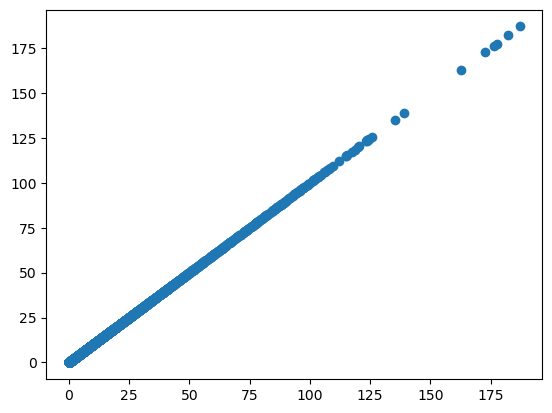

In [67]:
plt.scatter(y_te,p)
plt.show()

In [68]:
d1=pd.DataFrame({"Actual":y_te,"Predicted":p})
d1

,Actual,Predicted
14740,3.74,3.740000e+00
17767,5.37,5.370000e+00
12685,3.56,3.560000e+00
9891,25.37,2.537000e+01
2349,2.10,2.100000e+00
...,...,...
12030,8.70,8.700000e+00
17535,25.00,2.500000e+01
6884,22.81,2.281000e+01
3101,0.00,1.421085e-14


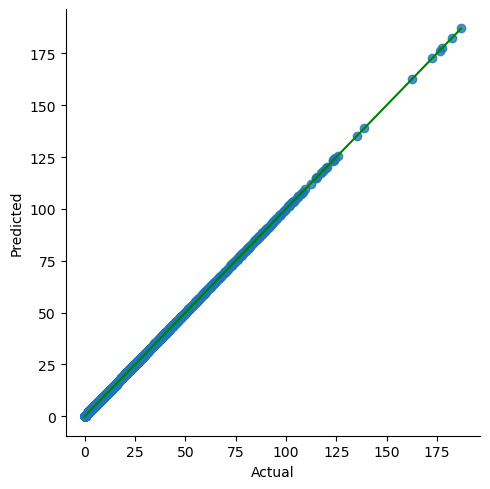

In [69]:
sns.lmplot(x="Actual",y="Predicted",data=d1,fit_reg=False)
d_line=np.arange(d1.min().min(),d1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# Lasso

In [70]:
from sklearn.linear_model import Lasso
la=Lasso()

In [71]:
la.fit(x_tr,y_tr)

Lasso()

In [72]:
la_p=la.predict(x_te)
#la_p

In [73]:
la.coef_

array([-0.        ,  0.        ,  0.        ,  0.01807274, -0.        ,
       14.97321556, -0.        , -0.        , -0.        ])

In [74]:
d2=pd.DataFrame({'importances':list(la.coef_),'columns':list(x)})
d2

,importances,columns
0,-0.000000,year
1,0.000000,gender
2,0.000000,age_group
3,0.018073,suicide_count
4,-0.000000,population
5,14.973216,suicide_rate
6,-0.000000,gdp_for_year
7,-0.000000,gdp_per_capita
8,-0.000000,generation


In [75]:
lr2=la.score(x_tr,y_tr)
lr2

0.9980049437914242

In [76]:
alr2=1-(((1-lr2)*(580-1))/(580-5-1))
alr2

0.997987565253022

In [77]:
msel=metrics.mean_squared_error(y_te,la_p)
msel                                                     #mean square error

0.7556512068148488

In [78]:
d2=pd.DataFrame({"Actual":y_te,"Predicted":la_p})
d2

,Actual,Predicted
14740,3.74,4.126737
17767,5.37,5.682693
12685,3.56,3.952669
9891,25.37,25.072420
2349,2.10,2.560397
...,...,...
12030,8.70,8.854022
17535,25.00,24.401298
6884,22.81,22.372120
3101,0.00,0.556480


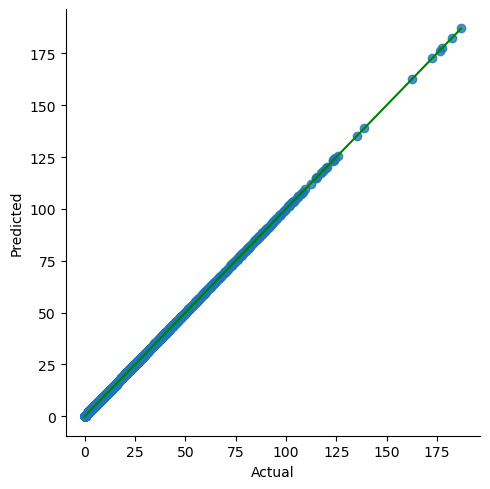

In [79]:
sns.lmplot(x="Actual",y="Predicted",data=d1,fit_reg=False)
d_line=np.arange(d2.min().min(),d2.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# RIDGE

In [80]:
from sklearn.linear_model import Ridge
rd=Ridge()

In [81]:
rd.fit(x_tr,y_tr)

Ridge()

In [82]:
rd_p=rd.predict(x_te)
#rd_p

In [83]:
rd.coef_

array([-1.97679606e-06,  5.40952425e-04,  9.14166757e-05,  4.53508697e-05,
       -6.69048541e-05,  1.56993144e+01,  3.37054311e-06,  5.04558009e-06,
       -3.34876359e-05])

In [84]:
d3=pd.DataFrame({'importances':list(rd.coef_),'columns':list(x)})
d3

,importances,columns
0,-0.000002,year
1,0.000541,gender
2,0.000091,age_group
3,0.000045,suicide_count
4,-0.000067,population
5,15.699314,suicide_rate
6,0.000003,gdp_for_year
7,0.000005,gdp_per_capita
8,-0.000033,generation


In [85]:
rdr2=rd.score(x_tr,y_tr)
rdr2

0.9999999986387113

In [86]:
ardr2=1-(((1-rdr2)*(580-1))/(580-5-1))
ardr2

0.9999999986268533

In [87]:
mser=metrics.mean_squared_error(y_te,rd_p)
mser                                                     #mean square error

5.064324008457214e-07

In [88]:
d4=pd.DataFrame({"Actual":y_te,"Predicted":rd_p})
d4

,Actual,Predicted
14740,3.74,3.740053
17767,5.37,5.369997
12685,3.56,3.560266
9891,25.37,25.370185
2349,2.10,2.100763
...,...,...
12030,8.70,8.699615
17535,25.00,25.000038
6884,22.81,22.809844
3101,0.00,0.000425


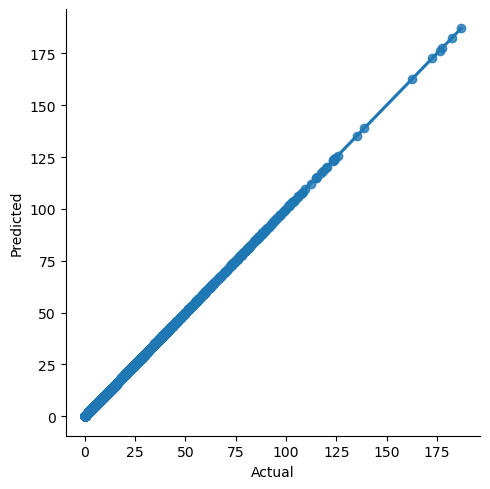

In [89]:
sns.lmplot(data=d4,x="Actual",y="Predicted")
plt.show()

# Rf

In [90]:
forest_p=rd.predict(x_te)

In [91]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(x_tr, y_tr)

RandomForestRegressor(max_depth=9)

In [92]:
rfr_r2=forest.score(x_tr,y_tr)        #alternate shortcut for R2
rfr_r2

0.9999758499807284

In [93]:
arfr2=1-(((1-rfr_r2)*(580-1))/(580-5-1))
arfr2

0.9999756396147069

In [94]:
mserf=metrics.mean_squared_error(y_te,forest_p)
mserf                                                     #mean square error

5.064324008457214e-07

In [95]:
d5=pd.DataFrame({"Actual":y_te,"Predicted":forest_p})
d5

,Actual,Predicted
14740,3.74,3.740053
17767,5.37,5.369997
12685,3.56,3.560266
9891,25.37,25.370185
2349,2.10,2.100763
...,...,...
12030,8.70,8.699615
17535,25.00,25.000038
6884,22.81,22.809844
3101,0.00,0.000425


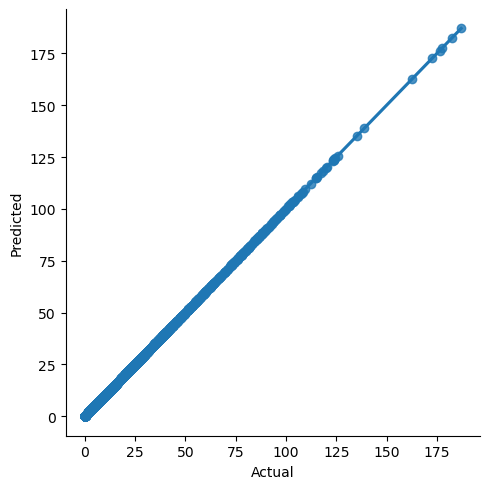

In [96]:
sns.lmplot(data=d5,x="Actual",y="Predicted")
plt.show()

the random forest gives us an accuracy of 99.4% better than the linear model,without tuning any parameter

# correlation

In [97]:
d2=d1.corr()
d2

,Actual,Predicted
Actual,1.0,1.0
Predicted,1.0,1.0


In [98]:
correlation_matrix= d1[['year','suicide_count', 'population', 'suicide_rate','gdp_per_capita']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

KeyError: "None of [Index(['year', 'suicide_count', 'population', 'suicide_rate',\n       'gdp_per_capita'],\n      dtype='object')] are in the [columns]"

# visualization 

In [ ]:
year_wise = d.groupby('year').sum()[['suicide_count']]
year_wise.plot()

In [ ]:
##year wise data of how much suicides are happening
c = d.groupby('country').sum(numeric_only=True).reset_index()
plt.figure(figsize=(10,25))
sns.barplot(data=c, y='country', x='suicide_count')

In [ ]:
year_order = d['year'].value_counts().index
plt.figure(figsize = (15,10))
sns.countplot(data=d, x='year', order=year_order,width = 0.7)
plt.title('Year by Suicide No',fontsize = 25)
plt.xlabel('Year',fontsize= 25)
plt.ylabel('No. of suicides_no',fontsize= 25);



In [ ]:
bar_age = sns.barplot(x = 'gender', y = 'suicide_count', hue = 'age_group',data = d)

In [ ]:
plt.figure(figsize=(10,3))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = d)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

In [ ]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = d)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

# Outliers

In [ ]:
d.boxplot(figsize=(20,10))
plt.show()

In [ ]:
##find Total Number of Suicides done by each age group.
d.groupby('age_group')['suicide_count'].sum().to_frame()


In [ ]:
sns.distplot(d["year"])
plt.show()

In [ ]:
d.year.describe()

In [ ]:
upper_boundary=d["year"].mean()+3*d["year"].std()
lower_boundary=d["year"].mean()-3*d["year"].std()
print(lower_boundary),print(upper_boundary)

In [ ]:
d.loc[d["year"]>2016.00,"year"]=2016.00

In [ ]:
sns.distplot(d["year"])
plt.show()

In [ ]:
d2.boxplot(column="age_group")
plt.show()

In [ ]:
d2.age_group.describe()

In [ ]:
upper_boundary=d2["age_group"].mean()+3*d2["age_group"].std()
lower_boundary=d2["age_group"].mean()-3*d2["age_group"].std()
print(lower_boundary),print(upper_boundary)

In [ ]:
d2.loc[d2["age_group"]>1.00,"year"]=1.00

In [ ]:
sns.distplot(d2["age_group"])
plt.show()

In [ ]:
d2.boxplot(column="suicide_count")
plt.show()

In [ ]:
d2.suicide_count.describe()

In [ ]:
upper_boundary=d2["suicide_count"].mean()+3*d2["suicide_count"].std()
lower_boundary=d2["suicide_count"].mean()-3*d2["suicide_count"].std()
print(lower_boundary),print(upper_boundary)

In [ ]:
d2.loc[d2["suicide_count"]>1.00,"suicide_count"]=1.00

In [ ]:
sns.distplot(d2["suicide_count"])
plt.show()

In [ ]:
sns.distplot(d["population"])
plt.show()

In [ ]:
d1.population.describe()

In [ ]:
upper_boundary=d1["population"].mean()+3*d1["population"].std()
lower_boundary=d1["population"].mean()-3*d1["population"].std()
print(lower_boundary),print(upper_boundary)

In [ ]:
d1.loc[d1["population"]>31.23,"population"]=31.23

In [ ]:
sns.distplot(d1["population"])
plt.show()

In [ ]:
d2.boxplot(column="suicide_rate")
plt.show()

In [ ]:
d1.suicide_rate.describe()

In [ ]:
upper_boundary=d1["suicide_rate"].mean()+3*d1["suicide_rate"].std()
lower_boundary=d1["suicide_rate"].mean()-3*d1["suicide_rate"].std()
print(lower_boundary),print(upper_boundary)

In [ ]:
d1.loc[d1["suicide_rate"]>13.94,"suicide_rate"]=13.94

In [ ]:
sns.distplot(d1["suicide_rate"])
plt.show()

# skewness treatment

In [ ]:
d.skew()

# Comparision of base model after EDA

In [ ]:
new_data_x=x.drop(['year','age_group','gdp_for_year','population'],axis=1)

In [ ]:
new_data_x

In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(new_data_x,y,test_size=0.2,random_state=101)

In [ ]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

In [ ]:
lr.fit(x_tr,y_tr)

In [ ]:
n_p1=lr.predict(x_te)

In [ ]:
n1_r2=lr.score(x_tr,y_tr)
n1_r2

In [ ]:
n1_ar2=1-(((1-n1_r2)*(580-1))/(580-2-1))
n1_ar2

In [ ]:
mse1=metrics.mean_squared_error(y_te,n_p1)
mse1  

# lasso

In [ ]:
la.fit(x_tr,y_tr)

In [ ]:
la_p=la.predict(x_te)

In [ ]:
la.coef_

In [ ]:
d6=pd.DataFrame({'importances':list(la.coef_),'columns':list(new_data_x)})
d6

In [ ]:
lar2=la.score(x_tr,y_tr)
lar2

In [ ]:
alar2=1-(((1-lar2)*(580-1))/(580-5-1))
alar2

In [ ]:
msel2=metrics.mean_squared_error(y_te,la_p)
msel2    

# ridge

In [ ]:
rd.fit(x_tr,y_tr)

In [ ]:
rd_p=rd.predict(x_te)

In [ ]:
rd.coef_

In [ ]:
df9=pd.DataFrame({'importances':list(rd.coef_),'columns':list(new_data_x)})
df9

In [ ]:
mser1=metrics.mean_squared_error(y_te,rd_p)
mser1                                                     #mean square error

In [ ]:
rdr3=rd.score(x_tr,y_tr)
rdr3

In [ ]:
ardr3=1-(((1-rdr3)*(580-1))/(580-5-1))
ardr3

# Rf

In [ ]:
forest.fit(x_tr, y_tr)

In [ ]:
forest_p=rd.predict(x_te)

In [ ]:
rfr1_r2=forest.score(x_tr,y_tr)        #alternate shortcut for R2
rfr1_r2

In [ ]:
arfr3=1-(((1-rfr_r2)*(580-1))/(580-5-1))
arfr3

In [ ]:
mser2=metrics.mean_squared_error(y_te,forest_p)
mser2      

# Comparision of Models

In [ ]:
#To compare the models performance, a dataframe is created. 
#The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
list1=['linear','Lasso','Ridge','Rf']
list2=[r2,lr2,rdr2,rfr_r2]
list3=[a_r2,alr2,ardr2,arfr2]
list4=[mse,msel,mser,mserf]



In [ ]:
final1=pd.DataFrame({'modelname':list1,'r2':list2,'a_r2':list3,'mse':list4})
final1

# Comparision of all Models

In [ ]:
list1=['linear1','Lasso1','Ridge1','Rf1','linear2','lasso2','Ridge2','Rf2']
list2=[r2,lr2,rdr2,rfr_r2,n1_r2,lar2,rdr3,rfr1_r2]
list3=[a_r2,alr2,ardr2,arfr2,n1_ar2,alar2,ardr3,arfr3]
list4=[mse,msel,mser,mserf,mse1,msel2,mser1,mser2]


In [ ]:
final2=pd.DataFrame({'modelname':list1,'r2':list2,'a_r2':list3,'mse':list4})
final2

# conclusion

In [ ]:


•1. The suicide number of the male is higher than female.

•2. The age group has the highest suicide number is 35-54 years.

•3. The country which has the highest suicide number is Russian.

•4. GDP, life expectancy and happiness score do not have a strong correlation with the suicide number.

•5. Happiness score has a strong correlation with life expectancy.

There are two files I attached, the ppt file is the result of my data mining, and the html file is about the processing I dealing with this data by Python.

Files